El valor obtenido por el algoritmo C es 15


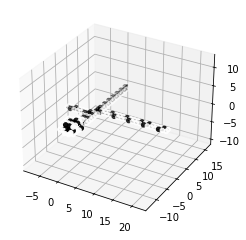

[(0, 0, 0),
 (-1, 0, 0),
 (-2, 0, 0),
 (-3, 0, 0),
 (-4, 0, 0),
 (-5, 0, 0),
 (-6, 0, 0),
 (-6, -1, 0),
 (-5, -1, 0),
 (-4, -1, 0),
 (-3, -1, 0),
 (-2, -1, 0),
 (-1, -1, 0),
 (0, -1, 0),
 (0, -2, 0),
 (-1, -2, 0),
 (-1, -3, 0),
 (0, -3, 0),
 (0, -4, 0),
 (-1, -4, 0),
 (-1, -5, 0),
 (0, -5, 0),
 (0, -6, 0),
 (-1, -6, 0),
 (-1, -7, 0),
 (0, -7, 0),
 (0, -8, 0),
 (-1, -8, 0),
 (-1, -9, 0),
 (0, -9, 0),
 (0, -10, 0),
 (0, -11, 0),
 (1, -11, 0),
 (1, -11, 1),
 (1, -10, 1),
 (2, -10, 1),
 (3, -10, 1),
 (3, -9, 1),
 (2, -9, 1),
 (2, -9, 2),
 (2, -8, 2),
 (2, -7, 2),
 (1, -7, 2),
 (1, -8, 2),
 (0, -8, 2),
 (-1, -8, 2),
 (-1, -9, 2),
 (0, -9, 2),
 (0, -10, 2),
 (-1, -10, 2),
 (-1, -11, 2),
 (0, -11, 2),
 (1, -11, 2),
 (2, -11, 2),
 (2, -10, 2),
 (1, -10, 2),
 (1, -9, 2),
 (1, -9, 1),
 (0, -9, 1),
 (0, -10, 1),
 (0, -11, 1),
 (-1, -11, 1),
 (-1, -12, 1),
 (0, -12, 1),
 (1, -12, 1),
 (1, -13, 1),
 (2, -13, 1),
 (2, -12, 1),
 (2, -11, 1),
 (2, -11, 0),
 (2, -10, 0),
 (1, -10, 0),
 (1, -9, 0),
 (2,

In [1]:
import aprox as apx
import proteins as pts
import math
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

#str_seq = 'PPHPPPHPPPHPPPHPPHPPPPPPPHPHHPPHPP'
#apx.prot_fold(str_seq, 'A')

#str_seq = 'PHPHPPPHHHHPPHPPPPPPPHHPHPHHPPPHPHHPHPPH'
#apx.prot_fold(str_seq, 'B')

str_seq = 'HPPPHPPPHPPPHHPPPHPPPHPPPHPPPHPPPHPPPHPHPPPHPPPHPPPHHPPPHPPPHPPPHPPPHPPPHPPPHPHPPPHPPPHPPPHHPPPHPPPHPPPHPPPHPPPHPPPHPHPPPHPPPHPPPHHPPPHPPPHPPPHPPPHPPPHPPPHP'
apx.prot_fold(str_seq, 'C', math.sqrt)

In [3]:
import scikit_posthocs as sp
import numpy as np
from scipy import stats as st
from IPython.display import display, HTML

with open('input.txt', 'r') as infile:
    samples = [0] * 36
    for i in range(72):
        aux = infile.readline()[:-1]
        if i % 2 == 0:
            aux = aux.split(' ')
            samples[i // 2] = [int(x) for x in aux]
    samples = np.array(samples)
    for i in range(6):
        print('Caso %i' % i)
        pvalues = sp.posthoc_conover_friedman(samples[6*i:6*i+6].T)
        print(pvalues)
        pvalues = sp.posthoc_conover_friedman(samples[6*i+1:6*i+6].T)
        print(pvalues)
        stats, pvalue = st.friedmanchisquare(samples[6*i], samples[6*i+1], samples[6*i+2], samples[6*i+3], samples[6*i+4], samples[6*i+5])
        print(stats, pvalue)
        stats, pvalue = st.friedmanchisquare(samples[6*i+1], samples[6*i+2], samples[6*i+3], samples[6*i+4], samples[6*i+5])
        print(stats, pvalue)
    for i in range(3):
        pvalues = sp.posthoc_conover_friedman(np.concatenate((samples[6*i+1:6*i+6], samples[6*i+19:6*i+24])).T)
        display(HTML(pvalues.to_html()))
        stats, pvalue = st.friedmanchisquare(samples[6*i+1], samples[6*i+2], samples[6*i+3], samples[6*i+4], samples[6*i+5], samples[6*i+19], samples[6*i+20], samples[6*i+21], samples[6*i+22], samples[6*i+23])
        print(stats, pvalue)

Caso 0
               0              1              2              3              4  \
0   1.000000e+00   1.217339e-85  6.259081e-223  1.502779e-293   0.000000e+00   
1   1.217339e-85   1.000000e+00   2.064240e-77  3.473269e-152  2.090125e-208   
2  6.259081e-223   2.064240e-77   1.000000e+00   1.611345e-27   7.117086e-72   
3  1.502779e-293  3.473269e-152   1.611345e-27   1.000000e+00   3.919400e-16   
4   0.000000e+00  2.090125e-208   7.117086e-72   3.919400e-16   1.000000e+00   
5   0.000000e+00  1.940743e-231   4.776772e-94   4.848056e-30   5.026066e-04   

               5  
0   0.000000e+00  
1  1.940743e-231  
2   4.776772e-94  
3   4.848056e-30  
4   5.026066e-04  
5   1.000000e+00  
               0             1              2              3              4
0   1.000000e+00  2.713042e-62  3.903559e-122  4.037806e-167  1.505691e-185
1   2.713042e-62  1.000000e+00   2.445304e-22   7.349017e-58   1.312105e-75
2  3.903559e-122  2.445304e-22   1.000000e+00   3.311071e-13   2.330125

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,6.229526e-37,1.198916e-80,3.801846e-120,9.400733e-139,2.742519e-01,1.109344e-35,2.328786e-80,2.768337e-111,9.117705e-124
1,6.229526e-37,1.000000e+00,2.835016e-12,5.679498e-33,6.564651e-45,8.537681e-43,8.080060e-01,3.758338e-12,9.984225e-28,3.358728e-35
2,1.198916e-80,2.835016e-12,1.000000e+00,2.585745e-07,1.721463e-13,1.438543e-88,5.063271e-13,9.676943e-01,5.030630e-05,2.250753e-08
3,3.801846e-120,5.679498e-33,2.585745e-07,1.000000e+00,2.426456e-02,4.392473e-129,3.525065e-34,2.086841e-07,2.683733e-01,6.559657e-01
4,9.400733e-139,6.564651e-45,1.721463e-13,2.426456e-02,1.000000e+00,5.158271e-148,2.722907e-46,1.278281e-13,7.901225e-04,7.057793e-02
5,2.742519e-01,8.537681e-43,1.438543e-88,4.392473e-129,5.158271e-148,1.000000e+00,1.849345e-41,2.856546e-88,4.889103e-120,8.980018e-133
6,1.109344e-35,8.080060e-01,5.063271e-13,3.525065e-34,2.722907e-46,1.849345e-41,1.000000e+00,6.772065e-13,7.659171e-29,1.919119e-36
7,2.328786e-80,3.758338e-12,9.676943e-01,2.086841e-07,1.278281e-13,2.856546e-88,6.772065e-13,1.000000e+00,4.232283e-05,1.786475e-08
8,2.768337e-111,9.984225e-28,5.030630e-05,2.683733e-01,7.901225e-04,4.889103e-120,7.659171e-29,4.232283e-05,1.000000e+00,1.206656e-01
9,9.117705e-124,3.358728e-35,2.250753e-08,6.559657e-01,7.057793e-02,8.980018e-133,1.919119e-36,1.786475e-08,1.206656e-01,1.000000e+00


935.4540441176478 1.4168362701872028e-195


,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,3.588267e-40,1.534405e-127,4.835109e-211,5.638631e-276,5.335220e-11,1.023295e-81,1.296764e-164,2.143994e-239,1.878441e-282
1,3.588267e-40,1.000000e+00,1.973068e-34,1.081703e-95,2.461756e-153,3.603286e-12,6.525278e-11,2.429683e-59,4.820522e-120,2.032630e-159
2,1.534405e-127,1.973068e-34,1.000000e+00,3.295522e-21,4.396789e-58,6.054596e-77,3.673470e-09,1.340898e-05,2.322886e-35,1.397428e-62
3,4.835109e-211,1.081703e-95,3.295522e-21,1.000000e+00,1.895602e-12,1.516946e-152,5.950098e-51,2.129576e-07,1.903906e-03,1.070868e-14
4,5.638631e-276,2.461756e-153,4.396789e-58,1.895602e-12,1.000000e+00,1.723785e-215,1.189511e-99,1.945375e-33,7.091044e-05,4.811489e-01
5,5.335220e-11,3.603286e-12,6.054596e-77,1.516946e-152,1.723785e-215,1.000000e+00,5.243675e-40,1.592829e-109,1.051490e-179,6.706483e-222
6,1.023295e-81,6.525278e-11,3.673470e-09,5.950098e-51,1.189511e-99,5.243675e-40,1.000000e+00,3.509958e-24,8.149825e-71,4.355286e-105
7,1.296764e-164,2.429683e-59,1.340898e-05,2.129576e-07,1.945375e-33,1.592829e-109,3.509958e-24,1.000000e+00,1.757646e-16,5.167707e-37
8,2.143994e-239,4.820522e-120,2.322886e-35,1.903906e-03,7.091044e-05,1.051490e-179,8.149825e-71,1.757646e-16,1.000000e+00,2.979732e-06
9,1.878441e-282,2.032630e-159,1.397428e-62,1.070868e-14,4.811489e-01,6.706483e-222,4.355286e-105,5.167707e-37,2.979732e-06,1.000000e+00


1262.3810686449435 4.118721096853262e-266


,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,5.656895e-57,3.251569e-197,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,5.656895e-57,1.000000e+00,1.957720e-64,3.440724e-209,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3.251569e-197,1.957720e-64,1.000000e+00,1.716028e-65,4.714195e-186,8.159073e-276,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,3.440724e-209,1.716028e-65,1.000000e+00,1.799141e-48,4.872649e-118,1.274472e-280,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,4.714195e-186,1.799141e-48,1.000000e+00,2.437376e-22,5.127786e-145,1.636926e-310,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00,8.159073e-276,4.872649e-118,2.437376e-22,1.000000e+00,5.662971e-69,3.817001e-220,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,1.274472e-280,5.127786e-145,5.662971e-69,1.000000e+00,5.662971e-69,1.599837e-192,1.047393e-291
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.636926e-310,3.817001e-220,5.662971e-69,1.000000e+00,1.189714e-49,7.328249e-128
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599837e-192,1.189714e-49,1.000000e+00,1.208629e-26
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.047393e-291,7.328249e-128,1.208629e-26,1.000000e+00


1723.703380488702 0.0
